# Demo of the LAMINAR package

In [1]:
import LAMINAR

import torch
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

In [2]:
# make moon dataset

X, _ = make_moons(n_samples=2500, noise=0.1)

# make a tensor
data = torch.tensor(X, dtype=torch.float32)
data.shape

torch.Size([2500, 2])

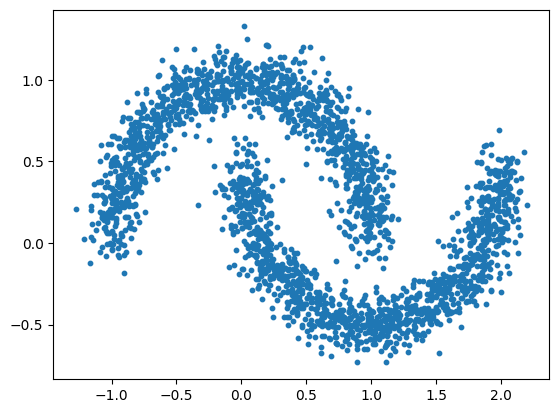

In [3]:
# visualize the dataset

plt.scatter(X[:, 0], X[:, 1], s=10);

In [4]:
# initialize the LAM class

hyperparameters = {
    'hidden_dim': 32,
    'width': 64,
    'timesteps': 50,
    'learning_rate': 5e-3,
    'patience': 15,
    'significance': 5.0,
    'batch_size': 128,
}

LAM = LAMINAR.LAMINAR(data, epochs=100, k_neighbours=25, hyperparameters=hyperparameters)

LAM.p_value()

Epoch 100 | Loss: 1.0402: 100%|██████████| 100/100 [08:39<00:00,  5.19s/it]


Shapiro-Wilk p-value:	0.2713646894542261


0.2713646894542261

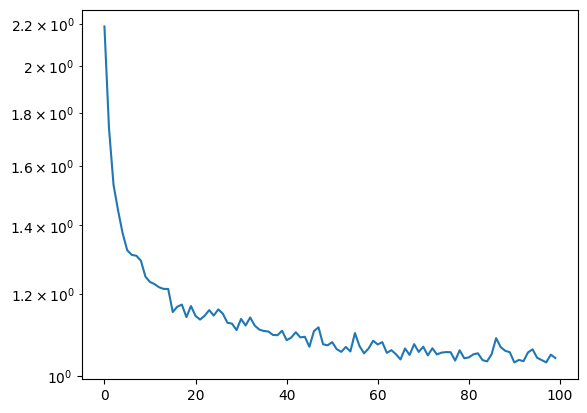

In [5]:
plt.plot(LAM.loss_history)
plt.yscale('log')

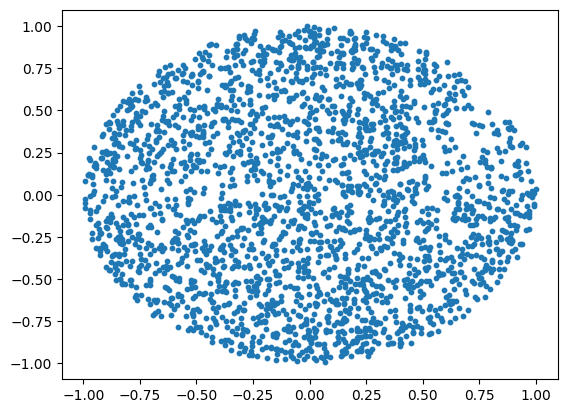

In [6]:
# visualize the pushed data
plt.scatter(LAM.data_pushed[:, 0], LAM.data_pushed[:, 1], s=10);

In [7]:
# default nearest neighbours of point with index 0
LAM.query(0)

([array([   0,  636,  978, 2124,  737, 1900, 2210, 1138, 1117, 1921, 1089,
          178, 1675, 1048, 1410,  236, 1763, 1004, 1266, 1720, 1508, 1509,
          722,  618,   46], dtype=int64)],
 [array([0.        , 0.00051394, 0.0010745 , 0.00118482, 0.00163907,
         0.00198349, 0.00211859, 0.0022434 , 0.00236931, 0.0026988 ,
         0.00270787, 0.00280739, 0.00283827, 0.00290687, 0.00303696,
         0.00303715, 0.00305526, 0.0031302 , 0.00360788, 0.00370349,
         0.00399189, 0.00409977, 0.00412652, 0.0043692 , 0.00438063])])

In [8]:
# query the 5 nearest neighbours of the points [0, 2, 5]
LAM.query(np.array([0, 2, 5]) , k_neighbours=5)

([array([   0,  636,  978, 2124,  737], dtype=int64),
  array([   2, 2234, 1267,   79,  192], dtype=int64),
  array([   5,   38, 1752, 1942,  857], dtype=int64)],
 [array([0.        , 0.00051394, 0.0010745 , 0.00118482, 0.00163907]),
  array([0.        , 0.00036926, 0.00057214, 0.00077993, 0.00083648]),
  array([0.        , 0.00068608, 0.00088048, 0.00095724, 0.00099979])])

In [9]:
# calculate the distance between the points 0 and 5
dist, path = LAM.distance(0, 5, return_path=True)
print(dist)

0.02407723054056987


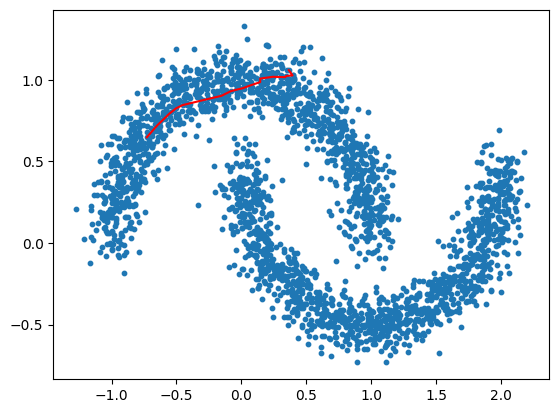

In [10]:
#plot data, and the shortest path between the points 0 and 5
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.plot(X[path, 0], X[path, 1], 'r')
plt.show()

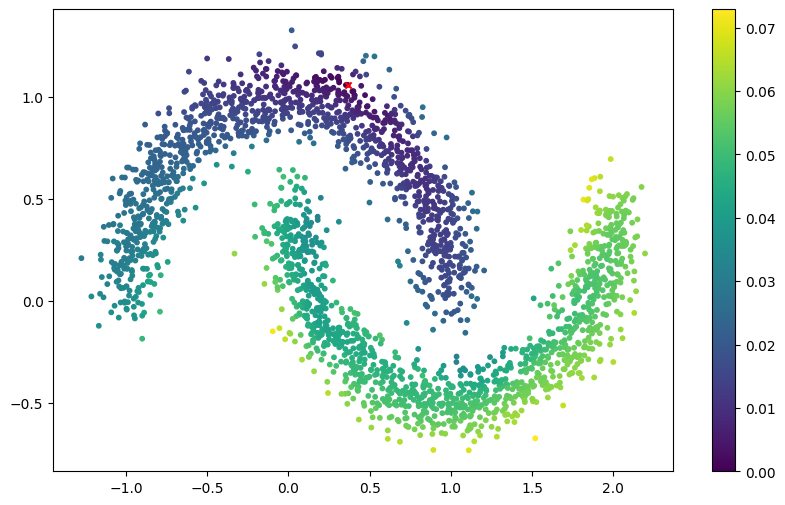

In [11]:
# calculate the distance to all points from the point 0 and plot

start_point = 0

dist = LAM.distance(start_point)

fig, ax = plt.subplots(figsize=(10, 6))

plot = ax.scatter(X[:, 0], X[:, 1], c=dist, cmap='viridis', s=10, vmin=0, vmax=dist.max())
ax.scatter(X[start_point, 0], X[start_point, 1], c='r', s=20, marker='x')
plt.colorbar(plot)
plt.show()
